In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/healthcare-insurance/insurance.csv


In [2]:
df=pd.read_csv("/kaggle/input/healthcare-insurance/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.duplicated().sum()

1

In [8]:
df=df.drop_duplicates()

In [9]:
df.shape

(1337, 7)

In [10]:
df.duplicated().sum()

0

In [11]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

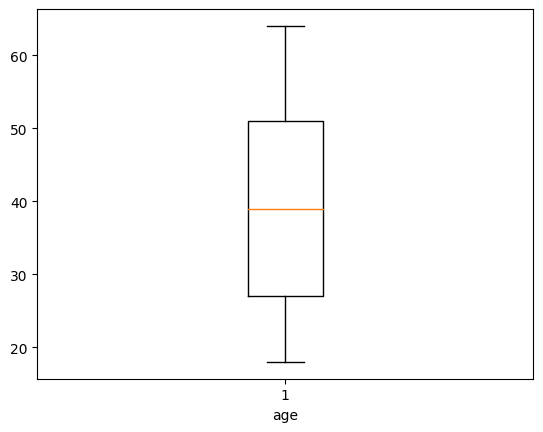

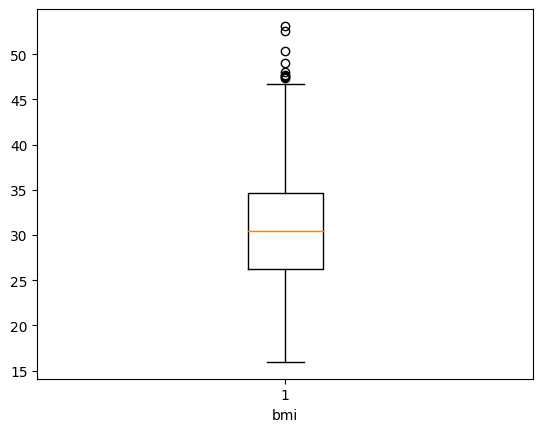

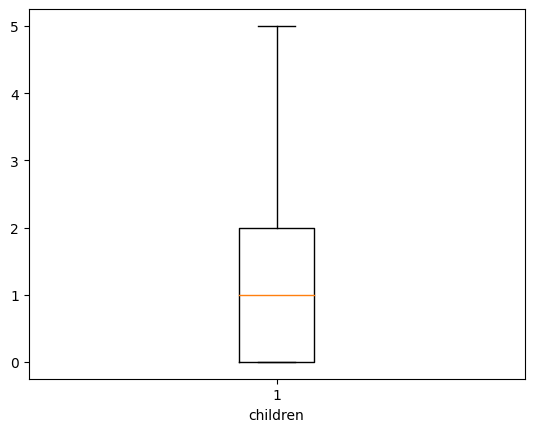

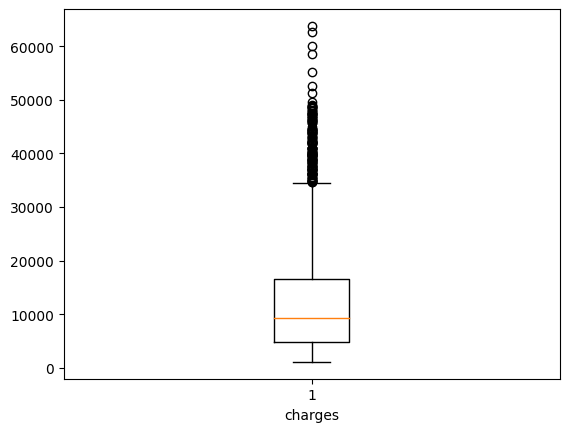

In [12]:
for i in df.columns:
    if (df[i].dtypes!='object'):
        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.show()
        

In [13]:
Q1=df['bmi'].quantile(0.25)
Q3=df['bmi'].quantile(0.75)
IQR=Q3-Q1
lb=Q1-1.5*IQR
ub=Q3+1.5*IQR
df=df[(df['bmi']>=lb) & (df['bmi']<=ub)]
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


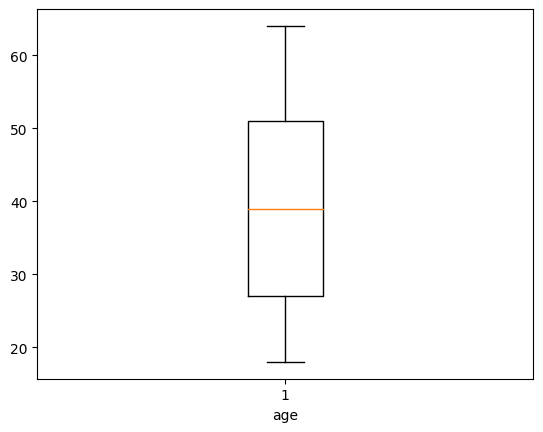

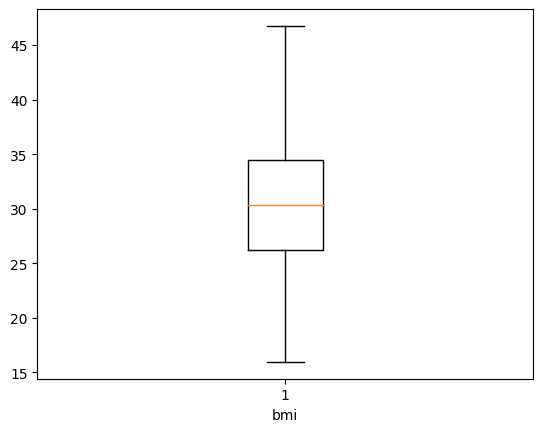

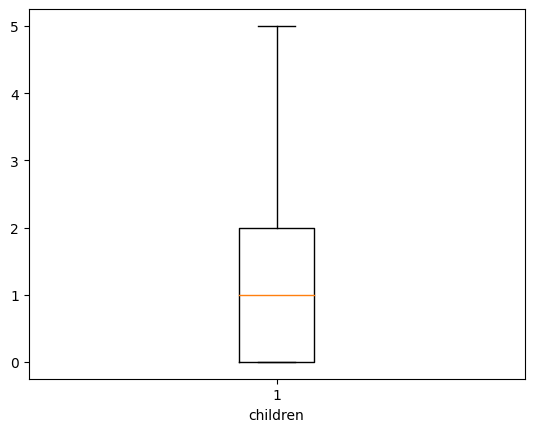

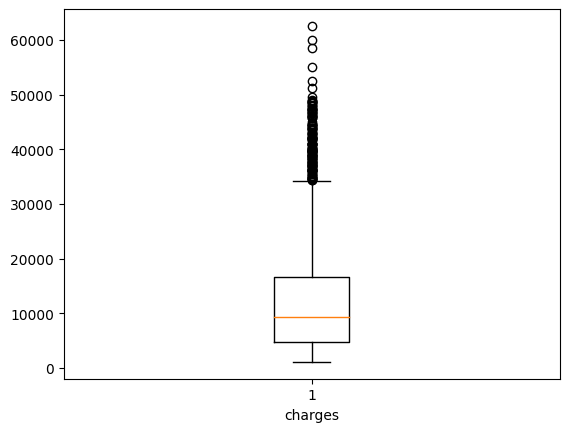

In [14]:
for i in df.columns:
    if (df[i].dtypes!='object'):
        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i])
df


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1328 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1328 non-null   int64  
 1   sex       1328 non-null   int64  
 2   bmi       1328 non-null   float64
 3   children  1328 non-null   int64  
 4   smoker    1328 non-null   int64  
 5   region    1328 non-null   int64  
 6   charges   1328 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 83.0 KB


In [17]:
x=df.drop(columns=['charges'])
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [18]:
y=df['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1328, dtype: float64

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=42)
x_train


,age,sex,bmi,children,smoker,region
623,18,1,33.535,0,1,0
541,20,0,31.790,2,0,2
140,34,1,22.420,2,0,0
1173,38,1,29.260,2,0,1
1036,22,1,37.070,2,1,2
...,...,...,...,...,...,...
1104,37,1,29.800,0,0,3
1139,19,0,32.490,0,1,1
1303,43,1,27.800,0,1,3
867,57,1,43.700,1,0,3


In [20]:
my_model=LinearRegression()

#traing data
my_model.fit(x_train, y_train)

LinearRegression()

In [21]:
#prediction
y_pred= my_model.predict(x_test)
y_pred

array([ 7880.46978427, 13209.32898603, 10583.58172291,  7956.6801571 ,
        4184.46734594, 13305.19052341,  8341.62106722,  6585.58594695,
        3728.11549574, 17412.74131376,  2578.15759617, 29707.49184694,
        5599.41053522, 32102.88221442,  5172.0561783 , 12385.62705365,
       10643.27776704,  6076.47495332, 11184.82197667, 27983.97882424,
        8087.08809558,  9155.00730188,  8334.82296007, 32863.5174939 ,
         146.92388949, 12952.80581025,  7934.14669491,  8416.10785305,
        8477.87859191, 27885.17189159,  7296.91705516,  6997.97782472,
        4453.53552028, 34022.9903133 ,  5248.39910914,  7411.17376037,
        6599.79009066,  4045.06912235,   652.69531011, 36480.04968105,
        4997.00477343,  -813.20276989,  7191.05580425,  5533.10300745,
       11194.73057388,  9032.69251952, 15369.15581437,  4668.2869495 ,
       15469.18542028, 33998.95248593,  -188.07679518,  4435.93294209,
       11700.92801579,  2268.97180189, 30133.78115588,  1026.35514376,
      

In [22]:
from sklearn.metrics import *
result=r2_score(y_test, y_pred)
result

0.7686317588962694

In [23]:
mae=mean_absolute_error(y_test,y_pred)
mae

4140.62663295605

In [24]:
mse=mean_squared_error(y_test,y_pred)
mse

35199679.46899382

In [25]:
rmse=np.sqrt(mse)
rmse

5932.93177687

In [26]:
y_test

1210     5373.36425
115     30259.99556
986      8410.04685
176      6455.86265
63       4133.64165
           ...     
294      3906.12700
1308    33900.65300
467     12643.37780
142     18972.49500
677     46130.52650
Name: charges, Length: 399, dtype: float64

<Axes: ylabel='charges'>

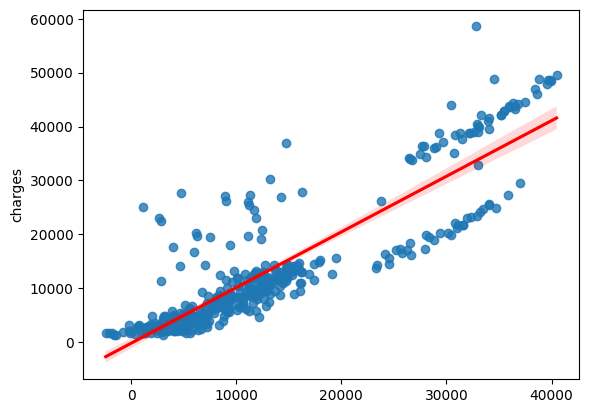

In [27]:
sns.regplot(x= y_pred, y= y_test, line_kws={'color':'red'})
